In [1]:
import os
import sys
from IPython.display import display, clear_output
import tensorflow as tf

sys.path.append(os.path.abspath("../"))
from src.utils import reload_script
from models_src.Support import LRCallback

clear_output(wait=True)
print(tf.config.list_physical_devices('GPU'))

[]


2024-11-29 11:08:53.356485: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (801)


In [11]:
reload_script('models_src.Trainer')

In [2]:
# set up databases
config_path = "../exp_lib/general_config/pixel_features.json"
%run -i ../exp_lib/datasets_generators/pixel_features.py {config_path}

In [3]:
# set up mlflow instance
%run -i ../exp_lib/mlflow/local_experiment.py {cfg.experiment_name}

In [4]:
# set up Trainer
model_def_path = "../exp_lib/model_def/unet_pixel_features.json"
trainer = None
%run -i ../exp_lib/utils/trainer_loader.py {model_def_path}

GridBox(children=(IntText(value=6, description='init_filters_power', layout=Layout(height='30px', width='300px…

Button(description='Accept Parameters', style=ButtonStyle())

Dictionary updated: {'input_shape': [32, 32, 3], 'init_filters_power': 6, 'levels': 3, 'level_convs': 3, 'init_dropout': 0.0, 'dropout': 0.3, 'batch_normalization': True, 'name': 'PxFeaturesUnet'}
Model: "PxFeaturesUnet"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Conne
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -    
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_
│ (BatchNormalization)        │                         │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch
│                             │ (None, 32, 32, 64)

In [5]:
trainer.train_model(
    epochs = 50,
    callbacks = [LRCallback(warmup_lr=1e-5, warmup_epochs=1, decay_ratio=0.96)],
    log = True,
    export_final_state = True,
    export_model = False,
    export_model_def = True
)

MLflow run: carefree-gnat-93


Epoch 1/50


I0000 00:00:1732801014.446428  131404 service.cc:146] XLA service 0x7f3d58034b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732801014.446739  131404 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-11-28 14:36:54.635932: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-28 14:36:55.520723: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  1/512 ━━━━━━━━━━━━━━━━━━━━ 2:04:08 15s/step - angle_loss: 0.1419 - center_vec_loss: 0.2301 - loss: 1.3940 - shape_class_F1: 0.0000e+00 - shape_class_loss: 0.1707 - thickness_loss: 0.8513

2024-11-28 14:37:03.560611: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_atan2_multiply_reduce_sine_fusion_1', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1732801023.598807  131404 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


511/512 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - angle_loss: 0.1412 - center_vec_loss: 0.2400 - loss: 1.2573 - shape_class_F1: 0.1349 - shape_class_loss: 0.1569 - thickness_loss: 0.7192

2024-11-28 14:37:17.930199: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_9', 1020 bytes spill stores, 1020 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm20_rcp_rn_f32_slowpath', 12 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 32 bytes spill stores, 32 bytes spill loads



512/512 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - angle_loss: 0.1412 - center_vec_loss: 0.2400 - loss: 1.2567 - shape_class_F1: 0.1356 - shape_class_loss: 0.1569 - thickness_loss: 0.7186 - val_angle_loss: 0.1431 - val_center_vec_loss: 0.2328 - val_loss: 0.9407 - val_shape_class_F1: 0.7046 - val_shape_class_loss: 0.1212 - val_thickness_loss: 0.4436 - learning_rate: 1.0000e-05
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - angle_loss: 0.1349 - center_vec_loss: 0.2266 - loss: 0.9141 - shape_class_F1: 0.7066 - shape_class_loss: 0.1142 - thickness_loss: 0.4384 - val_angle_loss: 0.0616 - val_center_vec_loss: 0.1473 - val_loss: 0.5760 - val_shape_class_F1: 0.7456 - val_shape_class_loss: 0.0874 - val_thickness_loss: 0.2797 - learning_rate: 0.0010
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - angle_loss: 0.0612 - center_vec_loss: 0.1445 - loss: 0.5633 - shape_class_F1: 0.7653 - shape_class_loss: 0.0791 - thickness_loss: 0.2785 - val_angle_loss: 0.0447 - val_center_vec_loss: 0.1188

2024/11/28 14:45:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-gnat-93 at: http://localhost:5000/#/experiments/806955696090293906/runs/bead8c37e2e34c96a37ab05c69e2be68.
2024/11/28 14:45:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/806955696090293906.


In [6]:
trainer.upload_weights_to_mlflow()

In [4]:
from exp_lib.utils.load_mlflow_model import load_mlflow_model
trainer.model = load_mlflow_model(run_name='carefree-gnat', load_weights=True, compile=True)

In [6]:
# Metric validation
%run -i ../exp_lib/metric_validation/unet_pixel_features.py --upload=1

256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - val_shape_class_loss: 0.0699 - val_angle_loss: 0.0922 - val_thickness_loss: 0.2674 - val_center_vec_loss: 0.2075
loss_value: 0.15927428


2024/11/28 14:46:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-gnat-93 at: http://localhost:5000/#/experiments/806955696090293906/runs/bead8c37e2e34c96a37ab05c69e2be68.
2024/11/28 14:46:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/806955696090293906.


[0.9896287, 0.9863032, 0.9840304]


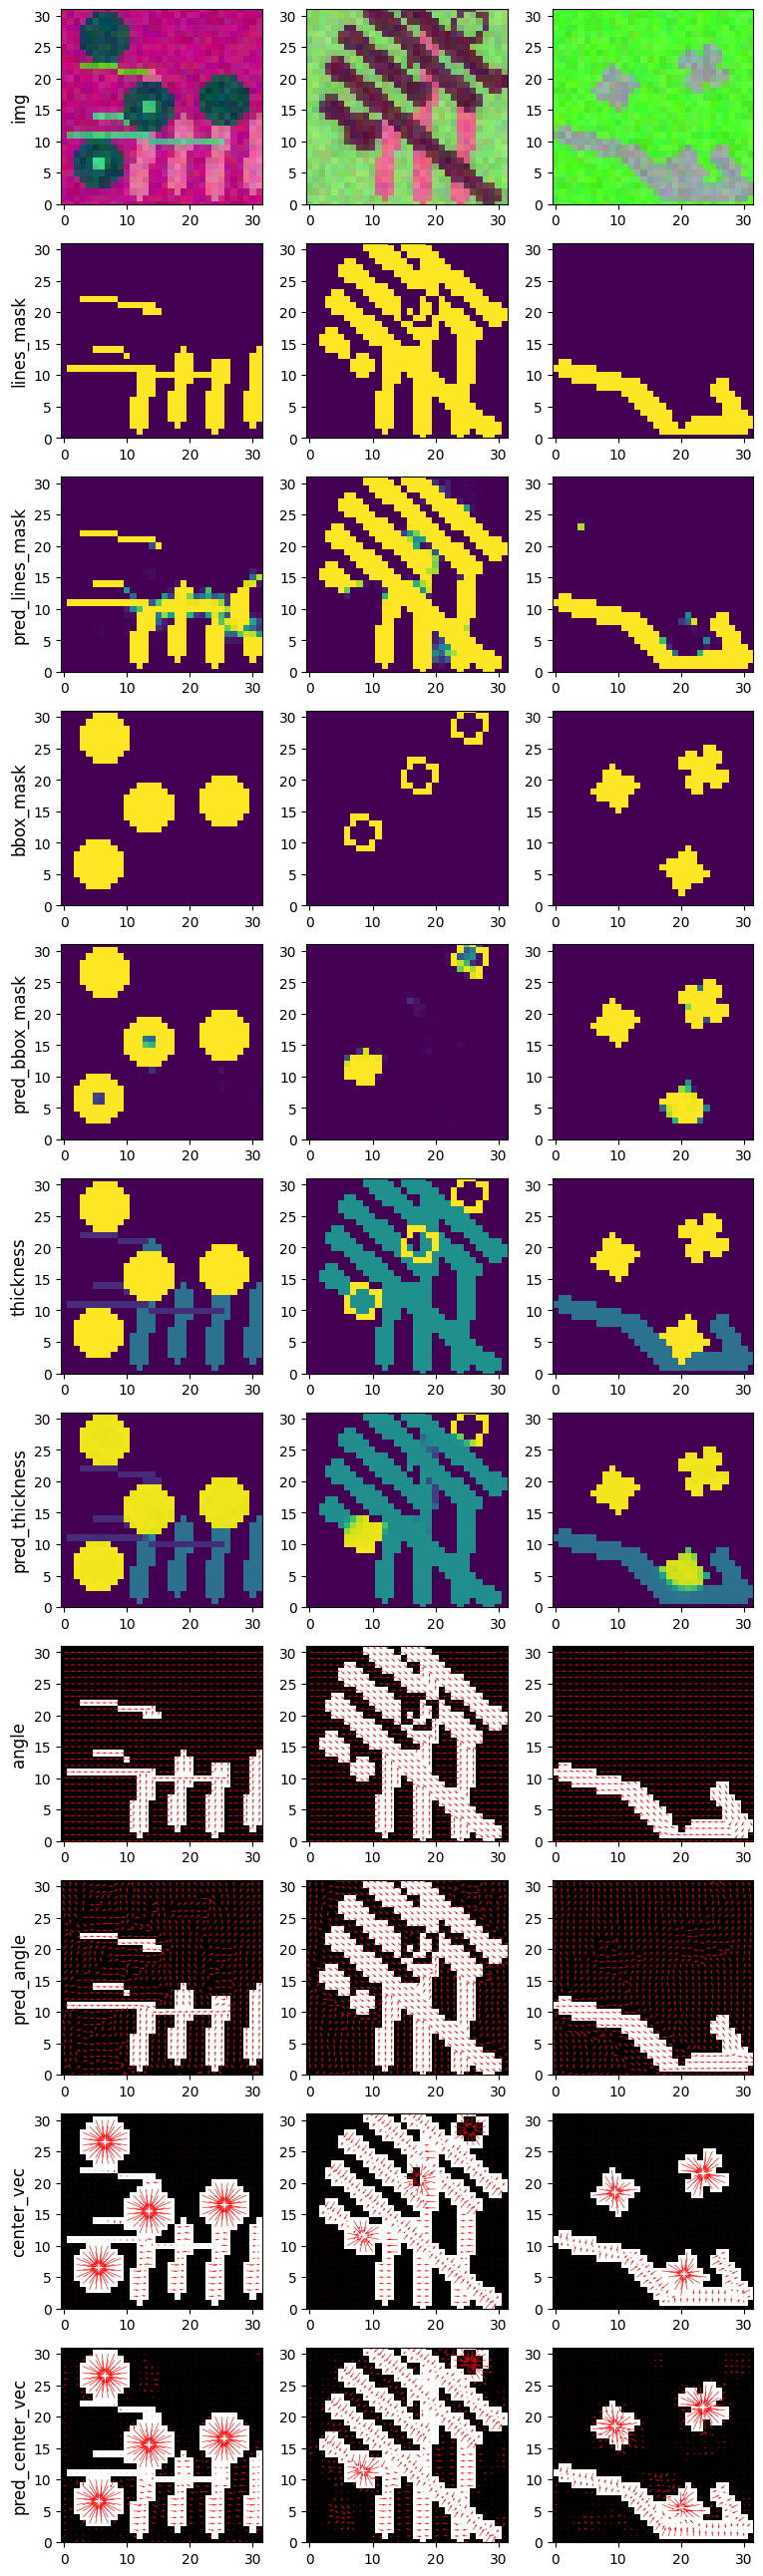

In [8]:
# Plot results
%run -i ../exp_lib/plots/unet_pixel_features.py --s=3

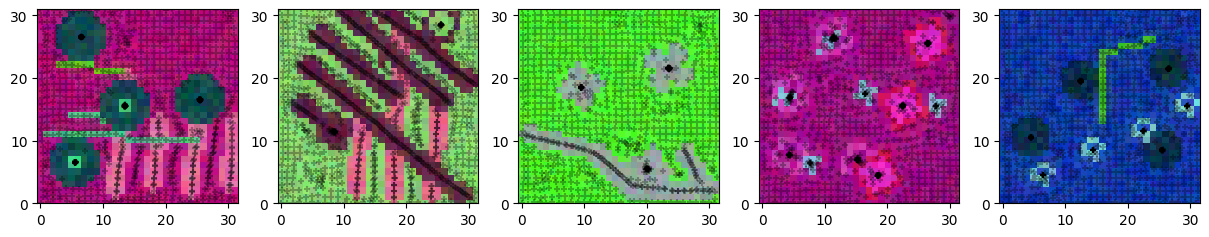

In [9]:
yx = xy_coords((32,32))[tf.newaxis,...,::-1]

center_vec_shifted_pos = tf.transpose(tf.reshape(yx + pred_center_vec[:5], (-1,32**2,2)), [0,2,1])[:,::-1]

fig, axs = plt.subplots(1,5, figsize=(5*3, 3))

for i, ax in enumerate(axs):
    ax.imshow(img[i])
    ax.scatter(*center_vec_shifted_pos[i], marker='+', color='black', s=15, alpha=0.3)
    ax.set_ylim(0,31)